In [39]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np

In [40]:
class IsingGap(object):
    def_inputs={}
    def __init__(self,inputs):
        self.inputs=inputs
     
    def iterate_parameter(self, par, par_range, input_ps):
        if type(par_range)==int:
            par_range=[par_range]
        start_time=time.time()
        start_cpu=time.clock()
        sig_set=np.arange(0.5,0.85,0.05)
        eps_set=np.arange(1.0,2.2,0.2)
        bootstrap.cutoff=1e-10
        for x in par_range:
            input_ps[par]=x
            tab1=bootstrap.ConformalBlockTable(input_ps['dim'],input_ps['kmax'],input_ps['lmax'],input_ps['mmax'],input_ps['nmax'])
            tab2=bootstrap.ConvolvedBlockTable(tab1)
            #Do we need dim,tab2,sig_set,eps_set as inputs here? Aren't they local variables?
            self.plot_grid(x,input_ps['dim'],tab2,sig_set,eps_set)
        end_time=time.time()
        end_cpu=time.clock()
        run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
        cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
        print("Run time "+run_time, "CPU time "+cpu_time)

    def plot_grid(self, parameter, dimension, table, sig_range, eps_range):
        start_time=time.time()
        start_cpu=time.clock()
        allowed_sig=[]
        allowed_eps=[]
        disallowed_sig=[]
        disallowed_eps=[]
        for sig in sig_range:
            for eps in eps_range:
                sdp=bootstrap.SDP(sig,table)
                sdp.set_bound(0,float(dimension))
                sdp.add_point(0,eps)
                result=sdp.iterate()
                if result:
                    allowed_sig.append(sig)
                    allowed_eps.append(eps)
                else:
                    disallowed_sig.append(sig)
                    disallowed_eps.append(eps)
        end_time=time.time()
        end_cpu=time.clock()
        run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
        cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
        plt.plot(allowed_sig,allowed_eps,'r+')
        plt.plot(disallowed_sig,disallowed_eps,'b+')
        plt.title("n_max="+str(parameter)+". Time Taken: "+run_time+". CPU Time: "+cpu_time)
        plt.show()

In [41]:
#Define the default input parameter dictionary.
def_inputs={}
def_inputs['dim']=3
def_inputs['kmax']=7
def_inputs['lmax']=7
def_inputs['nmax']=4
def_inputs['mmax']=2

In [42]:
#Instantiate an IsingGap object
ising_gap=IsingGap(def_inputs)

In [43]:
#Use its methods to plot grids using iterate_parameter
n_range=np.arange(1,4,1)

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


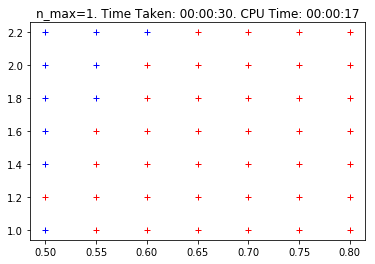

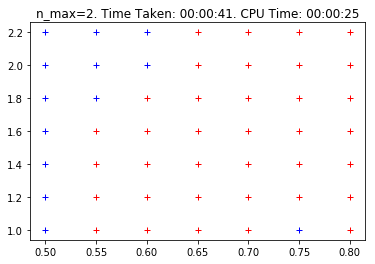

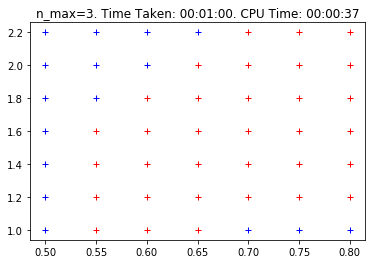

Run time 00:02:14 CPU time 00:01:23


In [44]:
ising_gap.iterate_parameter('nmax',n_range,ising_gap.inputs)